# ANALYSE DONNEES TER 2022-2024
## "La grip force, mesure objective de l'agentivité attribuée ?"

### 1. Importation et prétraitement des données

#### 1.1 Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

je commence par importer les données. Chaque dataframe est composé d'une colonne correspondant au numéro de frame (du stimulus), et de plusieurs colonnes correspondant aux répétitions.

In [2]:
# DONNEES DE GF

ancil = pd.read_csv('ancil/ancil.csv')
noAncil = pd.read_csv('ancil/noAncil.csv')
VA = pd.read_csv('augs/VA.csv')
noneVA = pd.read_csv('augs/noneVA.csv')
disVA = pd.read_csv('augs/disVA.csv')
highT = pd.read_csv('transp/highT.csv')
medT = pd.read_csv('transp/medT.csv')
lowT = pd.read_csv('transp/lowT.csv')

# Série pour n'avoir que les numéros de frame
frames = ancil.iloc[:,0]


In [3]:
# REPONSES AU QUESTIONNAIRE BF

BF = pd.read_csv('BF.csv')
BF['musician_contrib'] = BF['musician_contrib'].astype(float)

Ensuite, j'importe les données où se trouvent les marqueurs temporels,  correspondant aux "moments" clés du stimulus diffusé.

In [4]:
markers_ANCIL = pd.read_csv('ancil/markers_ANCIL.csv')
markers_AUGS = pd.read_csv('augs/markers_AUGS.csv')
markers_TRANSP = pd.read_csv('transp/markers_TRANSP.csv')

# la première colonne n'ayant pas de nom, je la nomme "frames".
markers_ANCIL.columns.values[0] = 'frames'
markers_AUGS.columns.values[0] = 'frames'
markers_TRANSP.columns.values[0] = 'frames'

# Je crée une colonne "numero" pour associer chaque marqueur à un numéro, utile par la suite pour identifier les marqueurs sur les plots.
markers_ANCIL['numero'] = range(1, len(markers_ANCIL) + 1)
markers_AUGS['numero'] = range(1, len(markers_AUGS) + 1)
markers_TRANSP['numero'] = range(1, len(markers_TRANSP) + 1)

#### 1.2 Prétraitement des données

Je crée une fonction "process_dataframe" qui permet pour un dataset donné de sortir la moyenne de toutes les répétitions, par frame. Il prend en entrée la variable contenant le dataframe (dataset), et un nom de variable à choisir (nom_variable, chaîne de caractères). Cette fonction crée également 3 variables, qui contiennent 1. le dataframe sans sa première colonne (numéro de frame), 2. la moyenne de chacune des lignes de ce dataframe, et 3. un dataframe recensant ces moyennes. Ces variables créées sont nommées sur la base du nom de variable (nom_variable) choisi.

In [5]:
def process_dataframe(dataset, nom_variable):
    # Subset sans la première colonne
    ## Pourquoi : La première colonne de chaque dataset affiche les frames. Elle ne sera pas utile dans l'analyse, car elle correspond exactement au numéros de lignes.
    subset = dataset.iloc[:, 1:]

    # Calcul de la moyenne pour chaque ligne
    calcul_mean = subset.mean(axis=1)
    calcul_sd = subset.std(axis=1)
    calcul_max = subset.max(axis=1)

    # DataFrame avec une seule colonne "Mean GF"
    mean_dataset = pd.DataFrame({
        'Mean GF': calcul_mean,
        'SD GF': calcul_sd,
        'Max GF': calcul_max
    })

    # Affichage des résultats
    print(f"Mean GF per frame for {nom_variable}:", mean_dataset.head())

    # Créer des variables dynamiques dans l'espace global
    globals()[f"{nom_variable}_subset"] = subset
    globals()[f"{nom_variable}_calcul_mean"] = calcul_mean
    globals()[f"{nom_variable}_calcul_sd"] = calcul_sd
    globals()[f"{nom_variable}_mean"] = mean_dataset

J'applique la fonction à toutes les variables, ce qui permet de sortir 8 dataframes, et de créer 8*3 = 24 variables.

In [6]:
process_dataframe(ancil, "ancil")
process_dataframe(noAncil, "noAncil")

Mean GF per frame for ancil:     Mean GF     SD GF    Max GF
0  0.088433  1.234454  4.761845
1  0.088613  1.234803  5.028542
2  0.090874  1.237994  5.428011
3  0.094353  1.242818  5.676446
4  0.098328  1.247790  5.749687
Mean GF per frame for noAncil:     Mean GF     SD GF    Max GF
0  0.082290  1.290817  6.538558
1  0.081903  1.282156  6.382387
2  0.084909  1.272199  6.103568
3  0.090295  1.261801  5.741476
4  0.097017  1.252311  5.356943


In [7]:
process_dataframe(VA, "VA")
process_dataframe(noneVA, "noneVA")
process_dataframe(disVA, "disVA")

Mean GF per frame for VA:     Mean GF     SD GF    Max GF
0  0.124712  1.289605  4.524717
1  0.123190  1.279185  5.028542
2  0.124370  1.270017  5.428011
3  0.127634  1.263583  5.676446
4  0.132466  1.260436  5.749687
Mean GF per frame for noneVA:     Mean GF     SD GF    Max GF
0  0.074609  1.263589  4.804067
1  0.080028  1.254991  4.716250
2  0.088911  1.246113  4.456344
3  0.099910  1.237249  4.245122
4  0.111703  1.229007  4.233704
Mean GF per frame for disVA:     Mean GF     SD GF    Max GF
0  0.056643  1.235805  6.538558
1  0.052756  1.241877  6.382387
2  0.050976  1.248959  6.103568
3  0.050430  1.254899  5.741476
4  0.050280  1.258523  5.356943


In [8]:
process_dataframe(highT, "highT")
process_dataframe(medT, "medT")
process_dataframe(lowT, "lowT")

Mean GF per frame for highT:     Mean GF     SD GF    Max GF
0  0.077186  1.236929  4.761845
1  0.078676  1.233330  4.499468
2  0.083795  1.232866  4.279042
3  0.091293  1.235753  4.332427
4  0.099922  1.241321  4.538877
Mean GF per frame for medT:     Mean GF     SD GF    Max GF
0  0.117748  1.240262  4.733112
1  0.119188  1.236296  5.028542
2  0.121811  1.233835  5.428011
3  0.124874  1.232248  5.676446
4  0.127910  1.231339  5.749687
Mean GF per frame for lowT:     Mean GF     SD GF    Max GF
0  0.061093  1.310145  6.538558
1  0.057892  1.304843  6.382387
2  0.058115  1.297397  6.103568
3  0.060935  1.287784  5.741476
4  0.065406  1.276628  5.356943


à présent, on peut afficher n'importe quel dataframe moyenné en utilisant "nom_variable" suivi de "_mean" :

In [9]:
# Exemple avec le dataframe "lowT" :
print(lowT_mean)

       Mean GF     SD GF    Max GF
0     0.061093  1.310145  6.538558
1     0.057892  1.304843  6.382387
2     0.058115  1.297397  6.103568
3     0.060935  1.287784  5.741476
4     0.065406  1.276628  5.356943
...        ...       ...       ...
1042 -0.053359  1.853115  5.935645
1043 -0.071999  1.849315  5.887866
1044 -0.087240  1.849057  5.873934
1045 -0.100575  1.852315  5.887411
1046 -0.110236  1.857592  5.914830

[1047 rows x 3 columns]


Je fusionne les dataframes moyennés par condition pour faire leur analyse statistique plus facilement sur JASP notamment :

In [10]:
# fusion des dataframes de même condition

# ancillarité
fusion_ancil = pd.concat([ancil_mean['Mean GF'], noAncil_mean['Mean GF']], axis=1)
fusion_ancil.columns = ['ancil mean GF', 'noAncil mean GF']

# transparence
fusion_transp = pd.concat([highT_mean['Mean GF'], medT_mean['Mean GF'], lowT_mean['Mean GF']], axis=1)
fusion_transp.columns = ['highT mean GF', 'medT mean GF', 'lowT mean GF']

# augmentations visuelles
fusion_augs = pd.concat([VA_mean['Mean GF'], noneVA_mean['Mean GF'], disVA_mean['Mean GF']], axis=1)
fusion_augs.columns = ['VA mean GF', 'noneVA mean GF', 'disVA mean GF']

print(fusion_augs.head())


   VA mean GF  noneVA mean GF  disVA mean GF
0    0.124712        0.074609       0.056643
1    0.123190        0.080028       0.052756
2    0.124370        0.088911       0.050976
3    0.127634        0.099910       0.050430
4    0.132466        0.111703       0.050280


### 2. Visualisation des données de GF

Je crée un plot des moyennes de préhension, en rajoutant les marqueurs temporels. Ils sont représentés par des traits verticaux rouges. Pour une mesure, il y a 1024 frames, ici l'équivalent de 5 secondes environ, soit la durée du stimulus (fréquence d'échantillonnage à 200 Hz)

Les marqueurs sont les suivants :
1. début du stimulus + début du son (frame 0)
2. début de la vidéo (fin de la transition en fondu) (frame 100)
3. début du mouvement (frame 302)
4. moment où le geste ancillaire est au plus haut (frame 343)
5. fin du mouvement + appui sur le bouton (frame 388)
6. fin de l'appui sur le bouton + début du mouvement de retrait (frame 535)
7. fin du mouvement de retrait (frame 590)
8. fin de la vidéo (début de la transition en fondu) (frame 903)
9. fin du son + fin du stimulus (frame 1004)

##### 2.1 Ancillarité

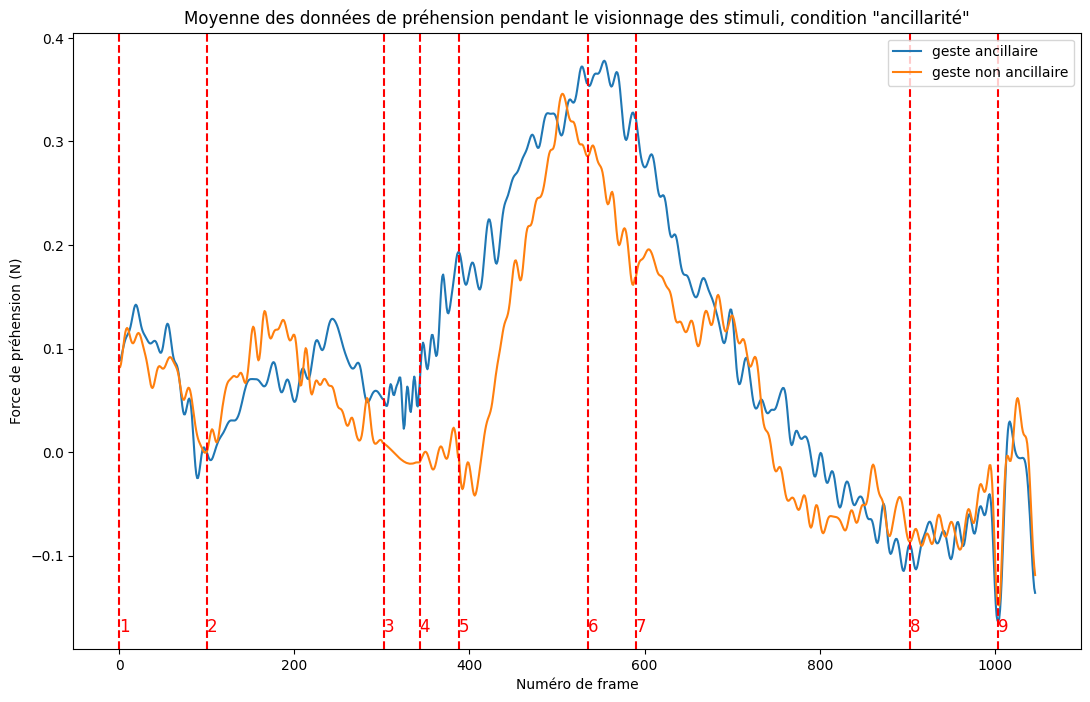

In [11]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, ancil_mean['Mean GF'], label = "geste ancillaire")
ax.plot(frames, noAncil_mean['Mean GF'], label = "geste non ancillaire")

# Ajouter les barres d'erreur
'''ax.errorbar(frames, ancil_mean['Mean GF'], yerr=ancil_mean['SD GF'], fmt='o-', color='blue', alpha=0.1, capsize=0, label="Geste Ancillaire ± SD")
ax.errorbar(frames, noAncil_mean['Mean GF'], yerr=noAncil_mean['SD GF'], fmt='o-', color='red', alpha=0.1, capsize=0, label="Geste Non Ancillaire ± SD")'''


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité"')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()


# marqueurs
for frame, numero in zip(markers_ANCIL['frames'], markers_ANCIL['numero']) :
    ax.axvline(x=frame, color='red', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "red")
    


##### 2.2 Augmentations visuelles

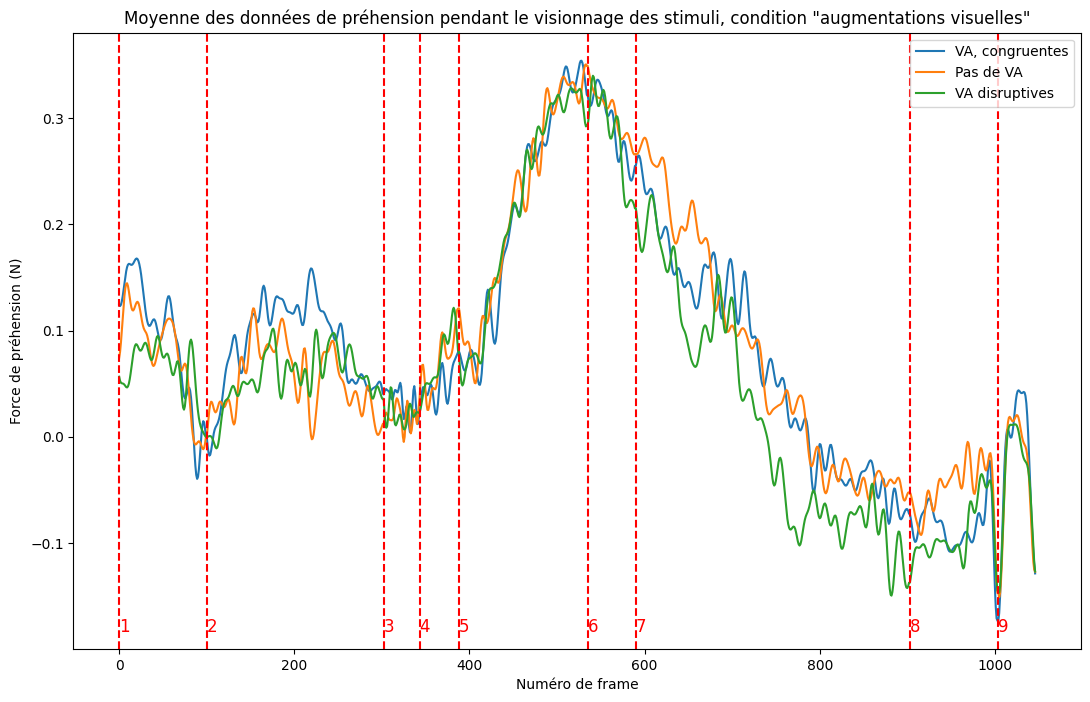

In [12]:
# fig = plt.figure(figsize=(13,8))
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, VA_mean['Mean GF'], label = "VA, congruentes")
ax.plot(frames, noneVA_mean['Mean GF'], label = "Pas de VA")
ax.plot(frames, disVA_mean['Mean GF'], label = "VA disruptives")

ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentations visuelles"')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()


# marqueurs
for frame, numero in zip(markers_ANCIL['frames'], markers_AUGS['numero']) :
    ax.axvline(x=frame, color='red', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "red")

##### 2.3 Transparence de l'interaction

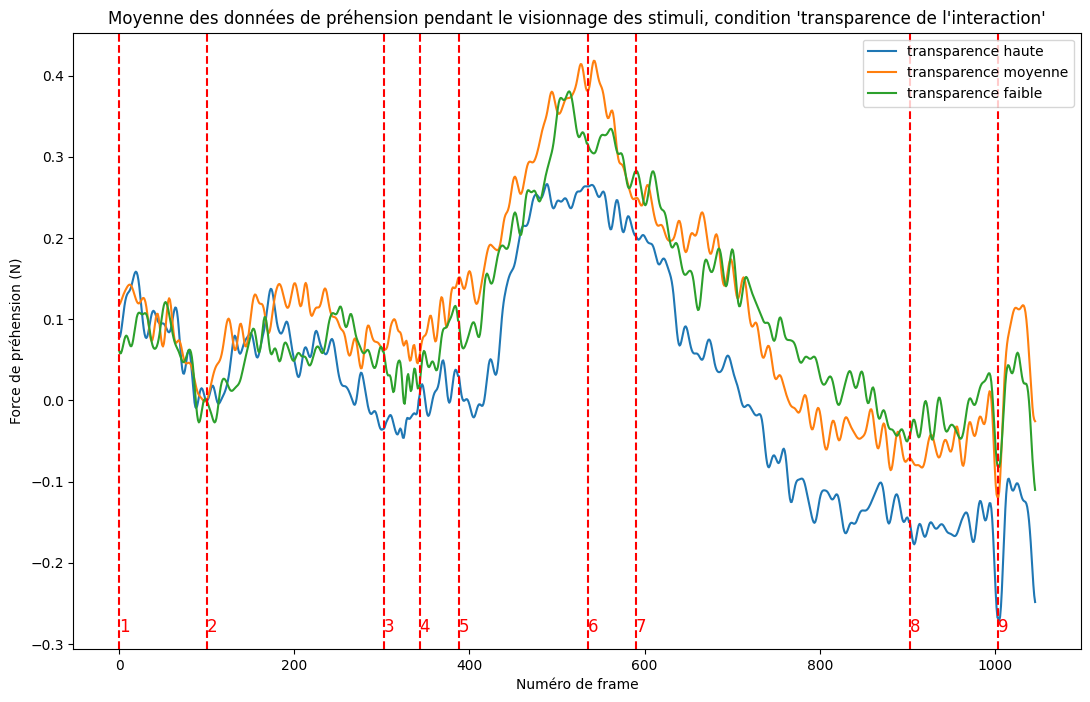

In [13]:
# fig = plt.figure(figsize=(13,8))
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, highT_mean['Mean GF'], label = "transparence haute")
ax.plot(frames, medT_mean['Mean GF'], label = "transparence moyenne")
ax.plot(frames, lowT_mean['Mean GF'], label = "transparence faible")


ax.set_title("Moyenne des données de préhension pendant le visionnage des stimuli, condition 'transparence de l'interaction'")
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()


# marqueurs
for frame, numero in zip(markers_TRANSP['frames'], markers_TRANSP['numero']) :
    ax.axvline(x=frame, color='red', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "red")

### 3. Analyse statistique de la GF

#### 3.1. Analyse sur l'ensemble de la mesure

##### 3.1.1. Vérification de la normalité : test de Shapiro-Wilk

Avant toute analyse, je m'assure de la normalité de la distribution des échantillons. Cela me permettra de choisir le test à effectuer. J'ai donc créé une fonction "test_normalité", qui effectue un test de Shapiro-Wilk en prenant en entrée un dataframe et une valeur alpha. Cette dernière est généralement de 0.1 dans ce cadre.

In [14]:
from scipy.stats import shapiro

def test_normalité(data, alpha=0.1):
    
    # Vérifier si l'entrée est une colonne de dataframe ou une série
    if isinstance(data, pd.DataFrame):
        data = data.iloc[:, 0]  # Prendre la première colonne si c'est un DataFrame
    
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(data)
    
    print(f"Statistique de Shapiro-Wilk: {stat}")
    print(f"p-value: {p_value}")

    # Résultats
    if p_value > alpha:
        print(f"p > {alpha} : L'échantillon suit une distribution normale (non rejet de H0).")
    else:
        print(f"p < {alpha} : L'échantillon ne suit pas une distribution normale (rejet de H0)")


 - ANCILLARITE

In [15]:
print("GESTE ANCILLAIRE :")
print(test_normalité(ancil_mean))
print('GESTE NON ANCILLAIRE :')
print(test_normalité(noAncil_mean))

GESTE ANCILLAIRE :
Statistique de Shapiro-Wilk: 0.9561165571212769
p-value: 3.640955903649339e-17
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
GESTE NON ANCILLAIRE :
Statistique de Shapiro-Wilk: 0.9532586336135864
p-value: 9.569829523277064e-18
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


- AUGMENTATION VISUELLE

In [16]:
print("AUGMENTATION VISUELLE CONGRUENTE :")
print(test_normalité(VA_mean))
print('PAS AUGMENTATION VISUELLE :')
print(test_normalité(noneVA_mean))
print('AUGMENTATION VISUELLE DISRUPTIVE :')
print(test_normalité(disVA_mean))

AUGMENTATION VISUELLE CONGRUENTE :
Statistique de Shapiro-Wilk: 0.9726983308792114
p-value: 3.892565523383462e-13
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
PAS AUGMENTATION VISUELLE :
Statistique de Shapiro-Wilk: 0.9306862354278564
p-value: 1.3151776930487295e-21
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
AUGMENTATION VISUELLE DISRUPTIVE :
Statistique de Shapiro-Wilk: 0.9449995160102844
p-value: 2.727714406870044e-19
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


- TRANSPARENCE DE L'INTERACTION

In [17]:
print("TRANSPARENCE HAUTE (HIGH) :")
print(test_normalité(highT_mean))
print('TRANSPARENCE MOYENNE (MEDIUM) :')
print(test_normalité(medT_mean))
print('TRANSPARENCE FAIBLE (LOW):')
print(test_normalité(lowT_mean))

TRANSPARENCE HAUTE (HIGH) :
Statistique de Shapiro-Wilk: 0.9617856740951538
p-value: 6.262970082327769e-16
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
TRANSPARENCE MOYENNE (MEDIUM) :
Statistique de Shapiro-Wilk: 0.9555654525756836
p-value: 2.8006886320612324e-17
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
TRANSPARENCE FAIBLE (LOW):
Statistique de Shapiro-Wilk: 0.9184253811836243
p-value: 2.5272905636799273e-23
p < 0.1 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


Les données ne siuivent pas une distribution normale : On ne pourra pas ici utiliser un test paramétrique (t-test ou ANOVA). Les tests non paramétriques qu'on peut utiliser pour les mesures répétées :
- Wilcoxon pour échantillons appariés (2 groupes)
- Test de permutation (2 groupes)
- Friedman (plus de 2 groupes)

##### 3.1.2. Condition "ancilarité" : test de Wilcoxon

J'ai créé une fonction permettant de faire un test de Wilcoxon, qui prend en entrée deux dataframes à comparer et la valeur alpha. Nous nous attendons à une non significativité des différences ; je fixe donc alpha à 0.1.

In [18]:
from scipy.stats import wilcoxon


def test_wilcoxon(data1, data2, alpha):
    # Vérification de type de donnée d'entrée
    if isinstance(data1, pd.DataFrame):
        # Si l'entrée est un dataframe, extraire la dernière colonne
        index_colonne = -1
        colonne = data1.columns[index_colonne]
        data1 = data1[colonne].dropna()
    elif isinstance(data1, pd.Series):
        # Si l'entrée est une série, l'utiliser directement
        data1 = data1.dropna()
    else:
        raise TypeError("L'entrée data1 doit être soit un dataframe, soit une série")

    # Même chose pour data2
    if isinstance(data2, pd.DataFrame):
        index_colonne = 0
        colonne = data2.columns[index_colonne]
        data2 = data2[colonne].dropna()
    elif isinstance(data2, pd.Series):
        data2 = data2.dropna()
    else:
        raise TypeError("L'entrée data2 doit être soit un dataframe, soit une série")

    # Vérifier que les deux séries de données ont la même longueur
    if len(data1) != len(data2):
        raise ValueError("Les deux ensembles de données doivent avoir le même nombre de valeurs")

    # Test de Wilcoxon
    stat, p_value = wilcoxon(data1, data2)

   # chaîne de résultats
    result = f"Statistique de Wilcoxon: {stat}\np-value: {p_value}\n"

    # Interprétation des résultats
    if p_value > alpha:
        result += f"p > {alpha} : Les différences entre les deux échantillons ne sont pas significatives (on ne rejette pas H0)."
    else:
        result += f"p < {alpha} : Les différences entre les deux échantillons sont significatives (on rejette H0)."
    
    return result


In [19]:
print(test_wilcoxon(ancil_mean['Mean GF'], noAncil_mean['Mean GF'], alpha = 0.1))

Statistique de Wilcoxon: 123040.0
p-value: 1.1021664641918052e-53
p < 0.1 : Les différences entre les deux échantillons sont significatives (on rejette H0).


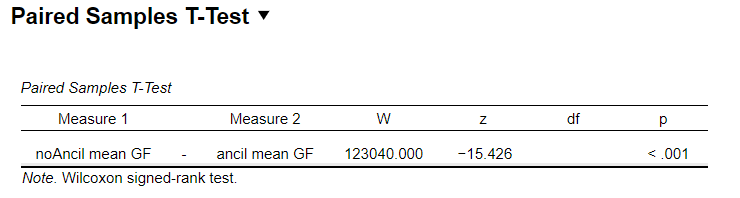
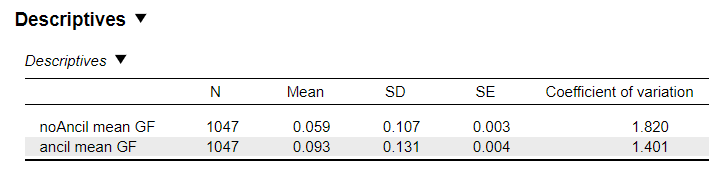

Pour toute la durée de la mesure (1024 frames) et pour toutes les mesures (toutes répétitions confondues), la différence entre la modalité ancillaire et non ancillaire est significative.

##### 3.1.3. Conditions "transparence" et "augmentations visuelles" : tests de Friedman

Pour comparer les modalités de transparence (high, medium, low) et celles des augmentations visuelles (VA = augmentation visuelle, noneVA = pas d'augmentation visuelle, disVA = augmentation visuelle disruptive), j'ai utilisé un test de Friedman. Celui-ci a été effectué sur JASP, et ses les résultats sont ci-dessous.

a. Transparence de l'interaction

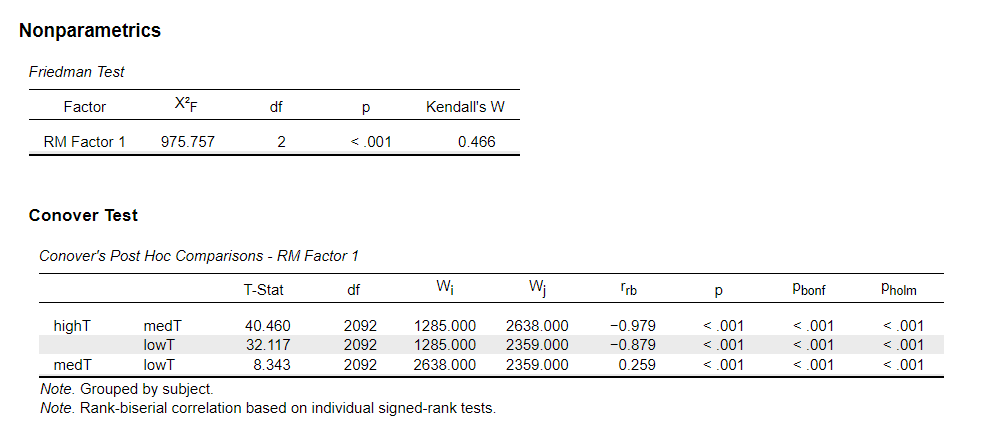
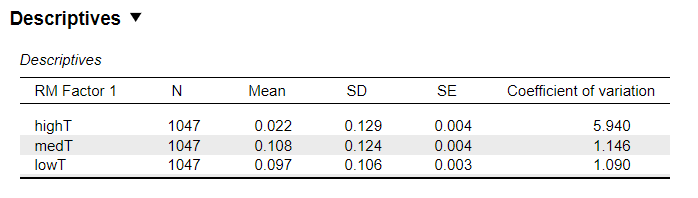

On constate que pour cette condition, au moins un échantillon parmi les trois est significativement différent. En faisant des tests post hoc, on constate que les échantillons présentent des données significativement différentes les unes des autres. La moyenne de GF la plus élevée est celle pour la modalité "transparence moyenne", avec 0.11 N de variation par rapoport à la baseline. Etonnamment, la moyenne de GF la moins élevée est celle de la modalité "transparence haute", avec 0.02 N de variation.

b. Augmentations visuelles

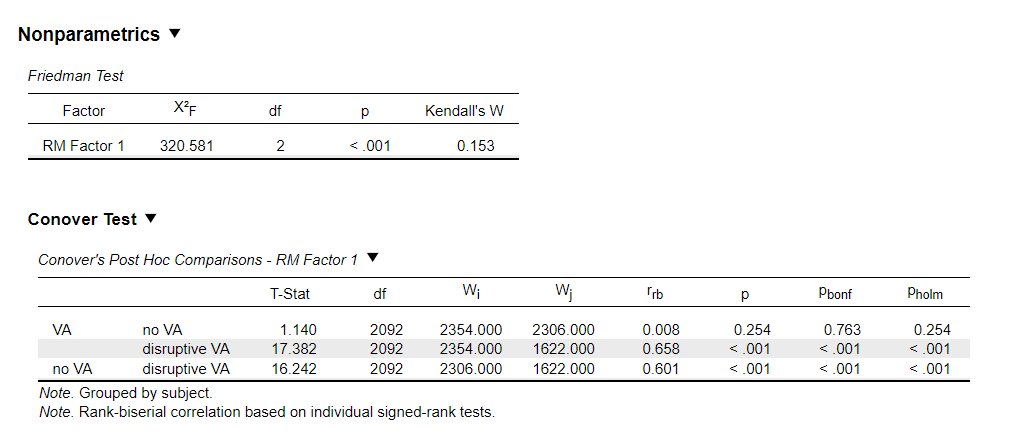
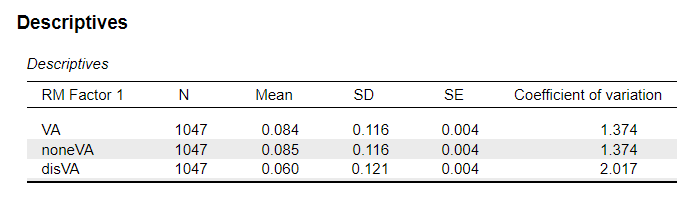

On constate que pour cette condition, au moins un échantillon parmi les trois est significativement différent. En faisant des tests post hoc, on constate que c'est la modalité "augmentations visuelles disruptive" qui se sépare des deux autres.

#### 3.2. Analyse par fenêtres temporelles

Pour faire une analyse statistique plus pertinente, il convient de prendre en compte des fenêtres définies, délimitées par les marqueurs temporels déjà mentionnés.

##### 3.2.1 Condition "ancillarité"

Ce qui nous intéresse ici, c'est le geste ancillaire : nous prendrons comme t0 le début du mouvement (marqueur 3), et t1 le moment où le geste ancillaire est au plus haut (marqueur 4). Le traitement visuel de bas-niveau (reconnaissance des formes, orientation...) arrivant environ 100ms après l'information visuelle, et le traitement de haut-niveau (catégorisation de l'information) arrivant environ 200ms après, nous pouvons déterminer les fenêtres temporelles, ou "périodes", pertinentes :

- P0, [t0-100ms ; t0] ou [t0-20 frames* ; t0] : moment avant le début du mouvement
- P1, [t0 ; t1] : moment entre le début du mouvement et le geste ancillaire
- P2, [t1 ; t1 + 100ms] ou [t1 ; t1 + 20 frames*] : moment entre le geste ancillaire et le début de son traitement de bas-niveau
- P3, [t1 + 100 ms ; t1 + 200ms] ou [t1 + 20 frames* ; t1 + 40 frames*]: moment entre le traitement de bas-niveau et le début du traitement de haut-niveau
- P4, [t1 + 200 ms ; t1 + 300ms] ou [t1 + 40 frames* ; t1 + 60 frames*] : moment du traitement de haut-niveau

(* Fréquence d'échantillonnage à 200 Hz)

###### a. Création des fenêtres temporelles

In [20]:
fusion_ancil_P0 = fusion_ancil.iloc[262:303]
fusion_ancil_P1 = fusion_ancil.iloc[302:344]
fusion_ancil_P2 = fusion_ancil.iloc[343:364]  
fusion_ancil_P3 = fusion_ancil.iloc[363:384]   
fusion_ancil_P4 = fusion_ancil.iloc[383:404]


###### b. Visualisation et analyse

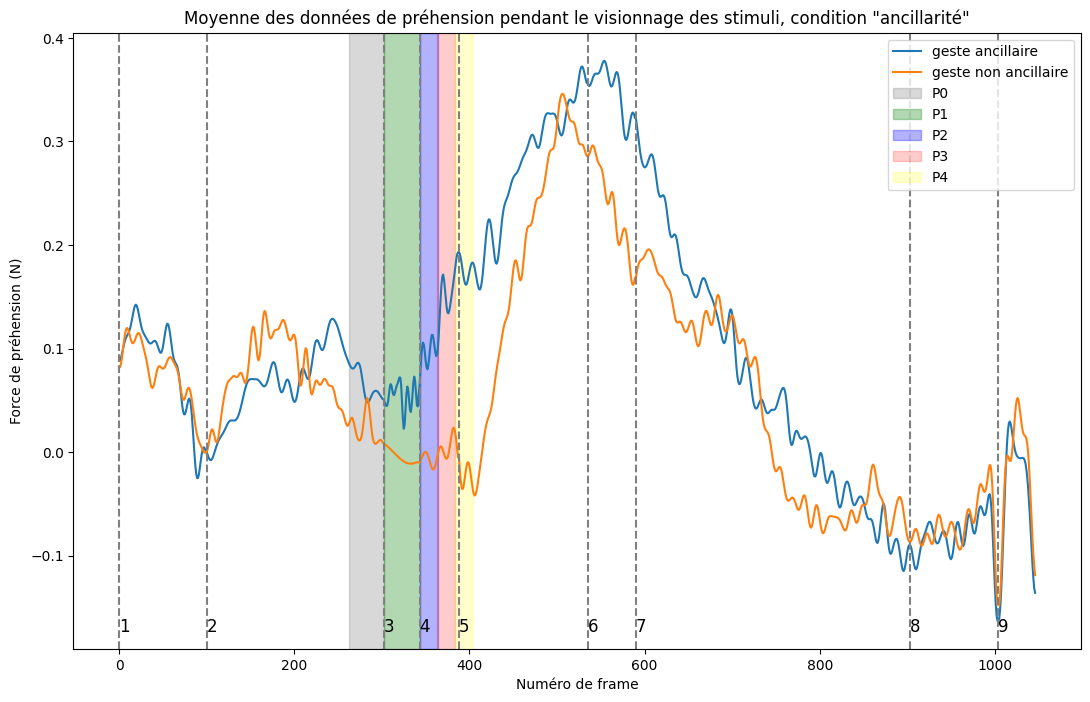

In [21]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, ancil_mean['Mean GF'], label = "geste ancillaire")
ax.plot(frames, noAncil_mean['Mean GF'], label = "geste non ancillaire")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité"')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

# identification des fenêtres
ax.axvspan(262, 302, color='grey', alpha=0.3, label="P0")
ax.axvspan(302, 344, color='green', alpha=0.3, label="P1")
ax.axvspan(343, 364, color='blue', alpha=0.3, label="P2")
ax.axvspan(363, 384, color='red', alpha=0.2, label="P3")
ax.axvspan(383, 404, color='yellow', alpha=0.2, label="P4")

ax.legend()


# marqueurs
for frame, numero in zip(markers_ANCIL['frames'], markers_ANCIL['numero']) :
    ax.axvline(x=frame, color='grey', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "black")

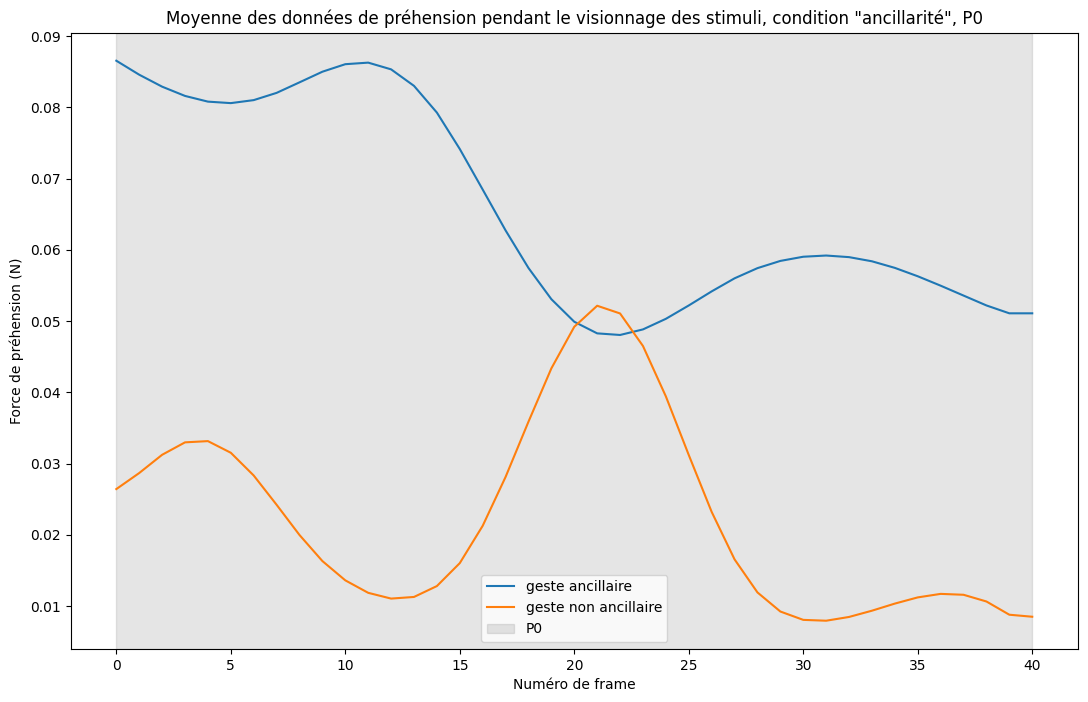

In [22]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_ancil_P0['ancil mean GF']))
ax.plot(x, fusion_ancil_P0['ancil mean GF'], label = "geste ancillaire")
ax.plot(x, fusion_ancil_P0['noAncil mean GF'], label = "geste non ancillaire")

ax.axvspan(0,40, color='grey', alpha=0.2, label="P0")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité", P0')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

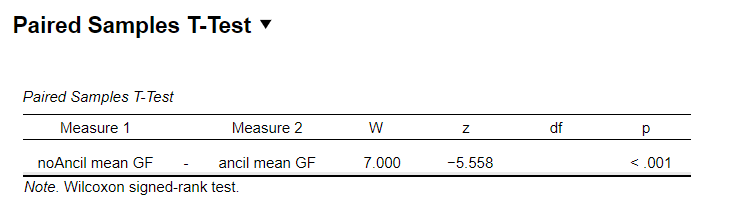

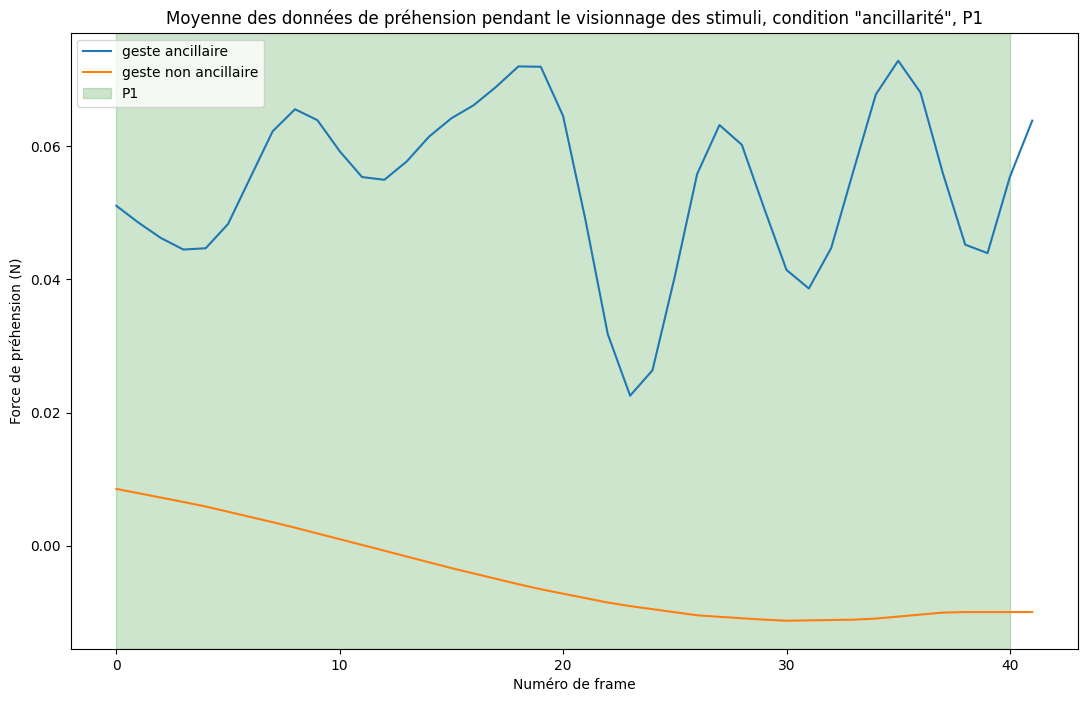

In [23]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_ancil_P1['ancil mean GF']))
ax.plot(x, fusion_ancil_P1['ancil mean GF'], label = "geste ancillaire")
ax.plot(x, fusion_ancil_P1['noAncil mean GF'], label = "geste non ancillaire")

ax.axvspan(0, 40, color='green', alpha=0.2, label="P1")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité", P1')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

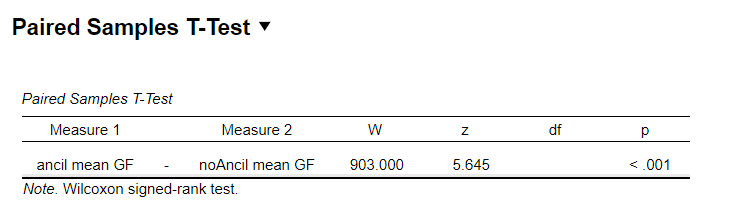

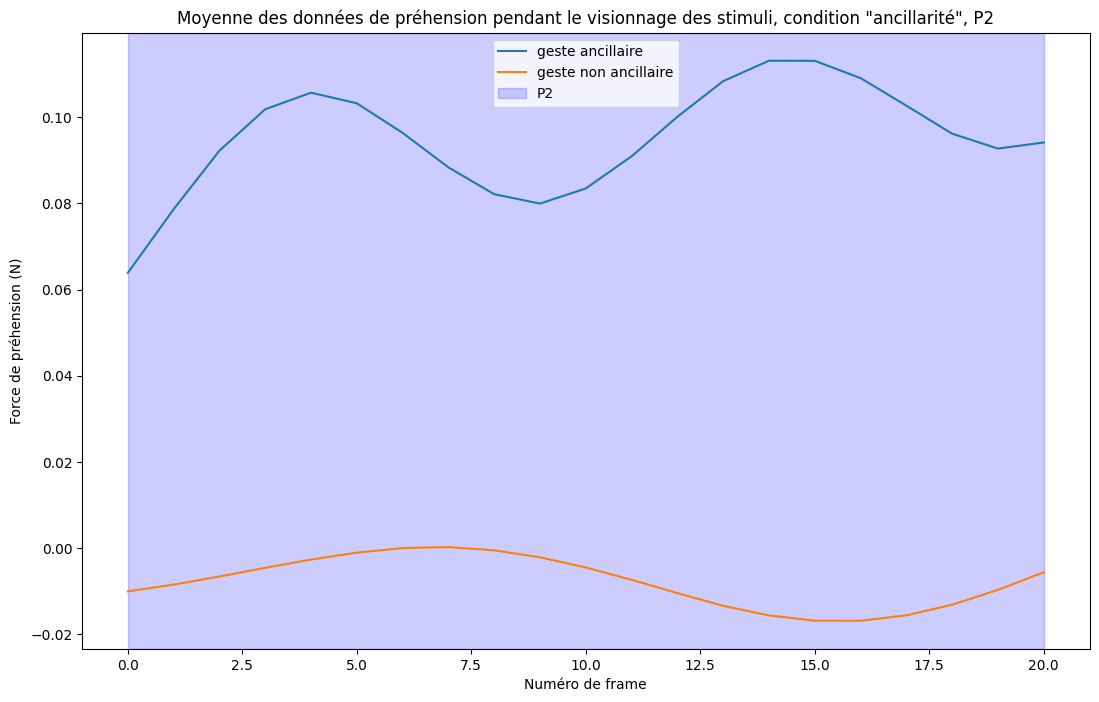

In [24]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_ancil_P2['ancil mean GF']))
ax.plot(x, fusion_ancil_P2['ancil mean GF'], label = "geste ancillaire")
ax.plot(x, fusion_ancil_P2['noAncil mean GF'], label = "geste non ancillaire")

ax.axvspan(0, 20, color='blue', alpha=0.2, label="P2")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité", P2')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

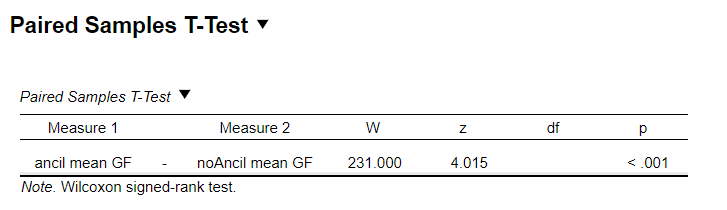

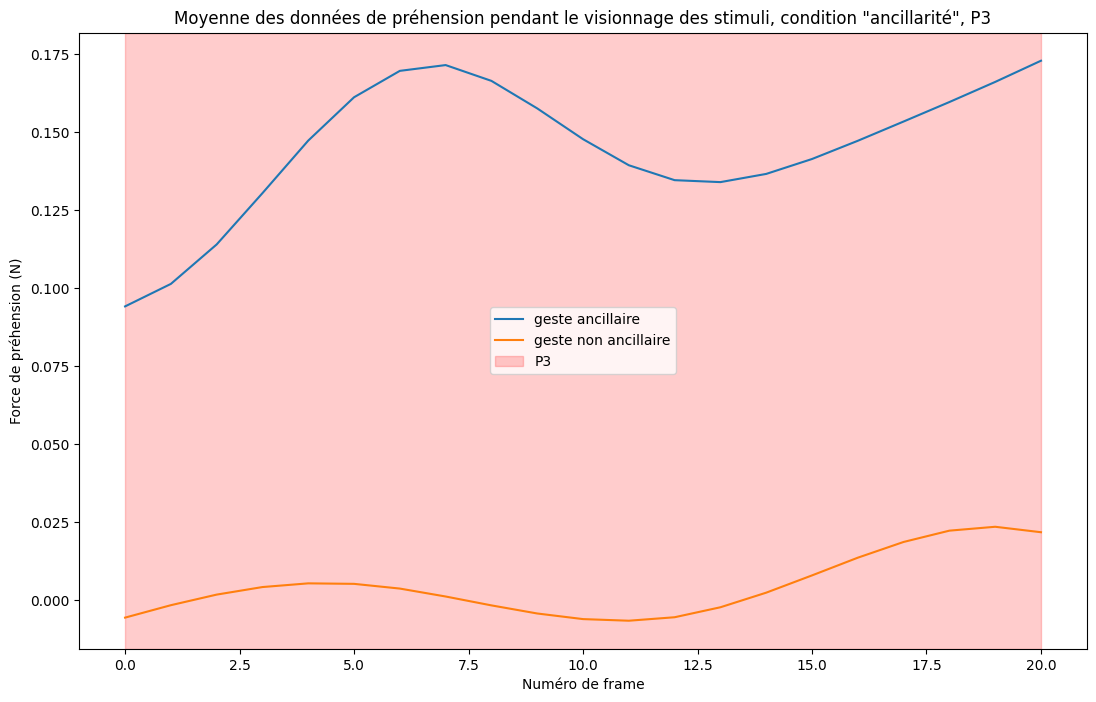

In [25]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_ancil_P3['ancil mean GF']))
ax.plot(x, fusion_ancil_P3['ancil mean GF'], label = "geste ancillaire")
ax.plot(x, fusion_ancil_P3['noAncil mean GF'], label = "geste non ancillaire")

ax.axvspan(0, 20, color='red', alpha=0.2, label="P3")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité", P3')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

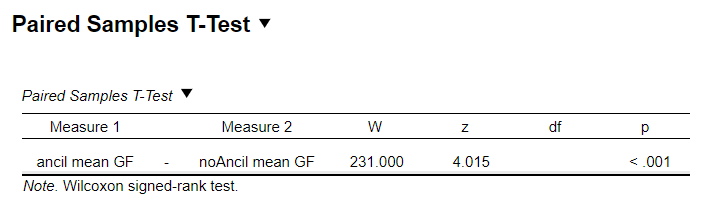

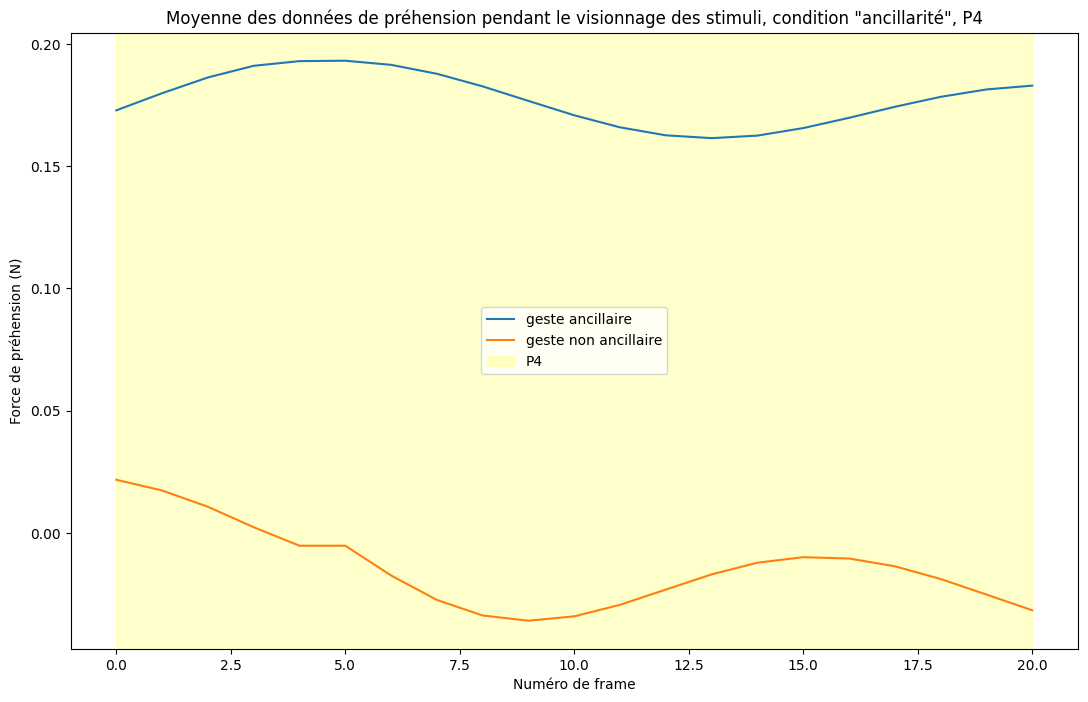

In [26]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_ancil_P4['ancil mean GF']))
ax.plot(x, fusion_ancil_P4['ancil mean GF'], label = "geste ancillaire")
ax.plot(x, fusion_ancil_P4['noAncil mean GF'], label = "geste non ancillaire")

ax.axvspan(0, 20, color='yellow', alpha=0.2, label="P4")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "ancillarité", P4')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

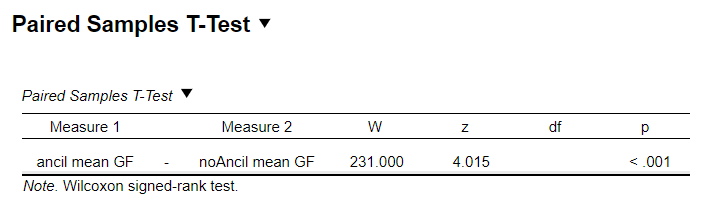

In [27]:
# P0
print("Résultats pour P0 :", test_wilcoxon_series(fusion_ancil_P0['ancil mean GF'], fusion_ancil_P0['noAncil mean GF'], alpha = 0.05))

# P1
print("\nRésultats pour P1 :", test_wilcoxon_series(fusion_ancil_P1['ancil mean GF'], fusion_ancil_P1['noAncil mean GF'], alpha = 0.05))

# P2
print("\nRésultats pour P2 :", test_wilcoxon_series(fusion_ancil_P2['ancil mean GF'], fusion_ancil_P2['noAncil mean GF'],alpha = 0.05))

# P3
print("\nRésultats pour P3 :", test_wilcoxon_series(fusion_ancil_P3['ancil mean GF'], fusion_ancil_P3['noAncil mean GF'], alpha = 0.05))

# P4
print("\nRésultats pour P4 :", test_wilcoxon_series(fusion_ancil_P4['ancil mean GF'], fusion_ancil_P4['noAncil mean GF'], alpha = 0.05))

NameError: name 'test_wilcoxon_series' is not defined

Les différences entre la modalité avec geste ancillaire et sans geste ancillaire sont significatives, quelle que soit la fenêtre temporelle.

##### 3.2.2 Condition "augmentation visuelle"

Ce qui nous intéresse ici, c'est la modification du son provoquée par le geste de l'artiste, engendrant une modulation de l'augmentation visuelle : nous prendrons comme t0 le début de l'appui sur le bouton (marqueur 5), et t1 le moment où l'artiste a retiré son doigt du bouton et a fini son geste (marqueur 7). C'est donc cette intervalle que nous allons prendre en considération.

- P0, [t0-100ms ; t0] ou [t0-20 frames* ; t0] : moment avant le début du mouvement
- P1, [t0 ; t1] : moment entre l'appui sur le bouton et la fin de l'appui/fin du geste

(* Fréquence d'échantillonnage à 200 Hz)

Nous nous attendons à un effet plus important pour l'augmentation visuelle congruente.

###### a. Création de fenêtres temporelles

In [ ]:
fusion_augs_P0 = fusion_augs.iloc[367:389]
fusion_augs_P1 = fusion_augs.iloc[389:590]

###### b. Visualisation et analyse

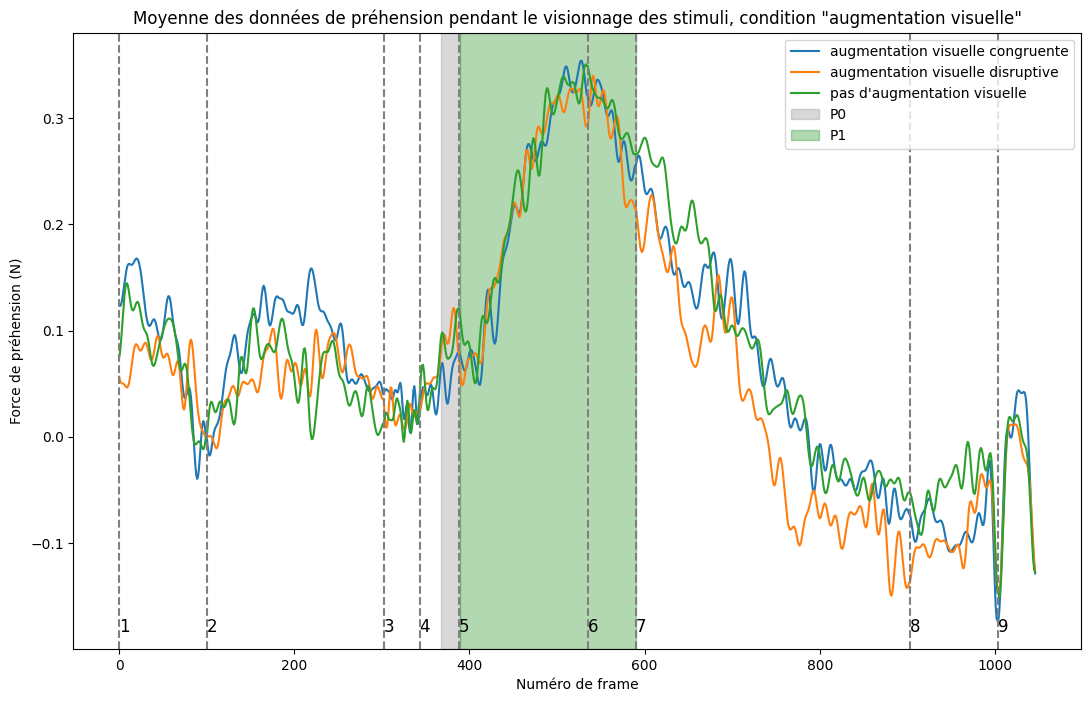

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, VA_mean['Mean GF'], label = "augmentation visuelle congruente")
ax.plot(frames, disVA_mean['Mean GF'], label = "augmentation visuelle disruptive")
ax.plot(frames, noneVA_mean['Mean GF'], label = "pas d'augmentation visuelle")

ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentation visuelle"')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

# identification des fenêtres
ax.axvspan(367, 389, color='grey', alpha=0.3, label="P0")
ax.axvspan(389, 590, color='green', alpha=0.3, label="P1")

ax.legend()


# marqueurs
for frame, numero in zip(markers_ANCIL['frames'], markers_ANCIL['numero']) :
    ax.axvline(x=frame, color='grey', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "black")

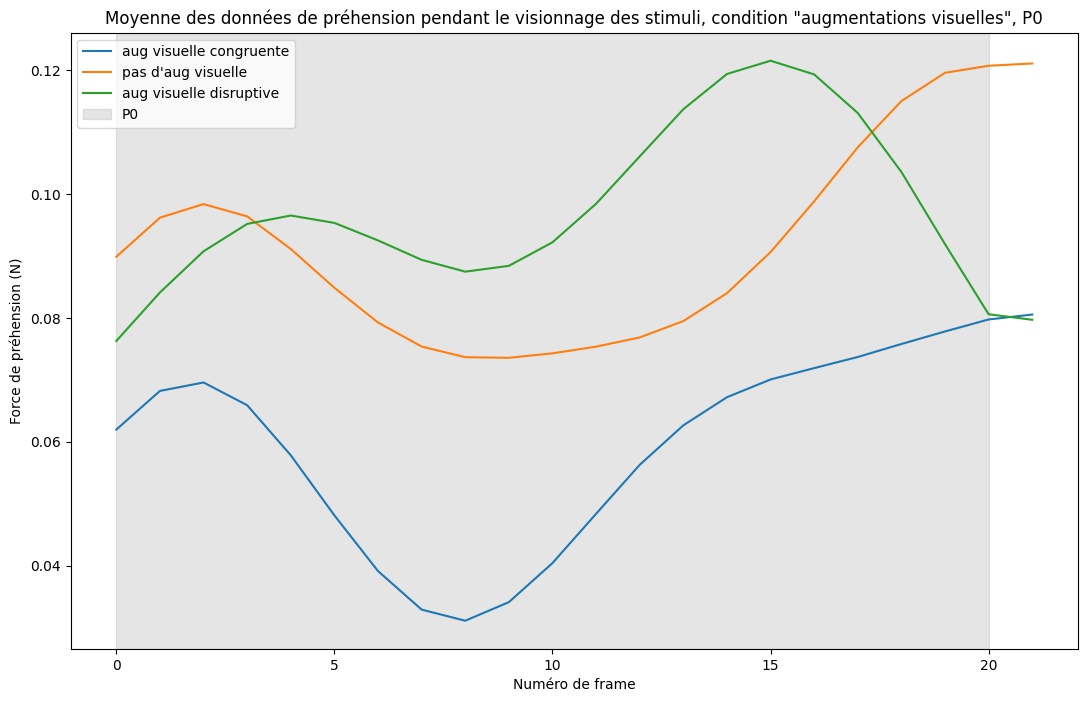

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_augs_P0['VA mean GF']))
ax.plot(x, fusion_augs_P0['VA mean GF'], label = "aug visuelle congruente")
ax.plot(x, fusion_augs_P0['noneVA mean GF'], label = "pas d'aug visuelle")
ax.plot(x, fusion_augs_P0['disVA mean GF'], label = "aug visuelle disruptive")

ax.axvspan(0, 20, color='grey', alpha=0.2, label="P0")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentations visuelles", P0')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

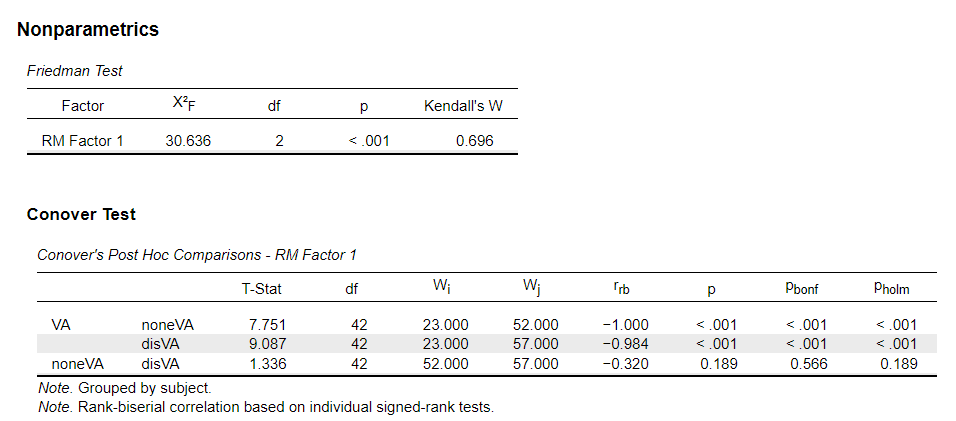

On constate une différence significative entre augmentation congruente et les deux autres modalités, mais pas entre la modalité sans augmentation et augmentation disruptive.

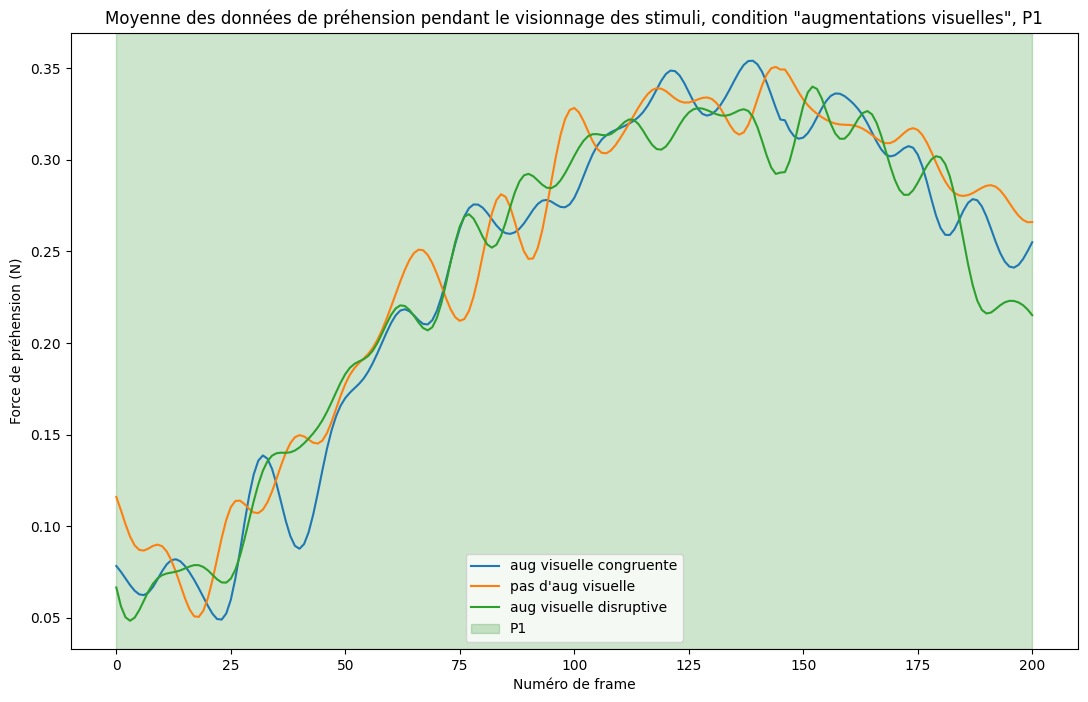

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_augs_P1['VA mean GF']))
ax.plot(x, fusion_augs_P1['VA mean GF'], label = "aug visuelle congruente")
ax.plot(x, fusion_augs_P1['noneVA mean GF'], label = "pas d'aug visuelle")
ax.plot(x, fusion_augs_P1['disVA mean GF'], label = "aug visuelle disruptive")

ax.axvspan(0, 200, color='green', alpha=0.2, label="P1")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentations visuelles", P1')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

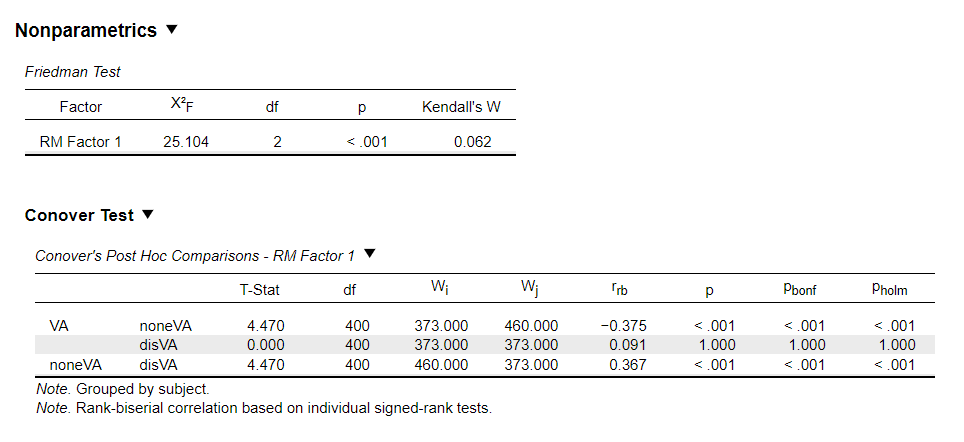

On constate une différence significative cette fois entre augmentation visuelle congruente et pas d'augmentation, en revanche pas de différence entre augmentation visuelle congruente et disruptive.

##### 3.2.3 Condition "transparence"

Nous utiliserons les mêmes marqueurs, car c'est également la modification du son provoquée par le geste de l'artiste qui nous intéresse : nous prendrons comme t0 le début de l'appui sur le bouton (marqueur 5), et t1 le moment où l'artiste a retiré son doigt du bouton et a fini son geste (marqueur 7).

- P0, [t0-100ms ; t0] ou [t0-20 frames* ; t0] : moment avant le début du mouvement
- P1, [t0 ; t1] : moment entre l'appui sur le bouton et la fin de l'appui/fin du geste

(* Fréquence d'échantillonnage à 200 Hz)

Nous nous attendons à un effet plus important pour la transparance haute.

###### a. Création des fenêtres temporelles

In [ ]:
fusion_transp_P0 = fusion_transp.iloc[367:389]
fusion_transp_P1 = fusion_transp.iloc[389:590]

###### b. Visualisation et analyse

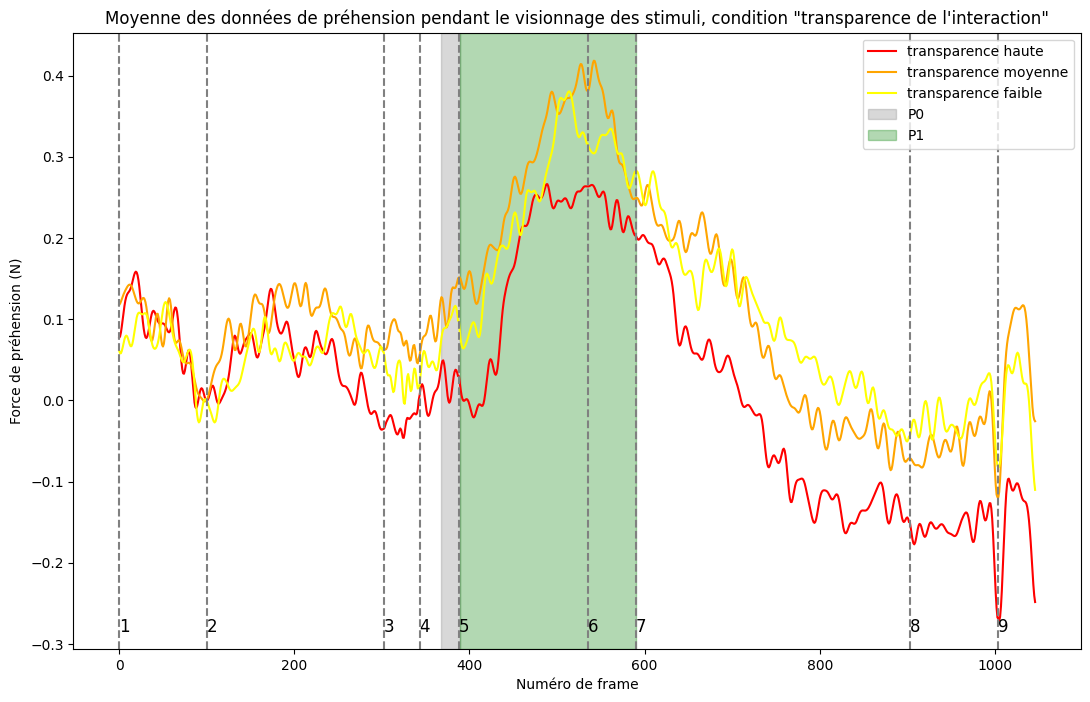

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(frames, highT_mean['Mean GF'], label = "transparence haute", color = "red")
ax.plot(frames, medT_mean['Mean GF'], label = "transparence moyenne", color = "orange")
ax.plot(frames, lowT_mean['Mean GF'], label = "transparence faible", color = "yellow")

ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "transparence de l\'interaction"')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

# identification des fenêtres
ax.axvspan(367, 389, color='grey', alpha=0.3, label="P0")
ax.axvspan(389, 590, color='green', alpha=0.3, label="P1")

ax.legend()


# marqueurs
for frame, numero in zip(markers_ANCIL['frames'], markers_ANCIL['numero']) :
    ax.axvline(x=frame, color='grey', linestyle='--', linewidth=1.5)
    ax.text(frame, 0.05, numero, transform=ax.get_xaxis_transform(),
            horizontalalignment='left', verticalalignment='top', rotation=0, fontsize=12, color = "black")

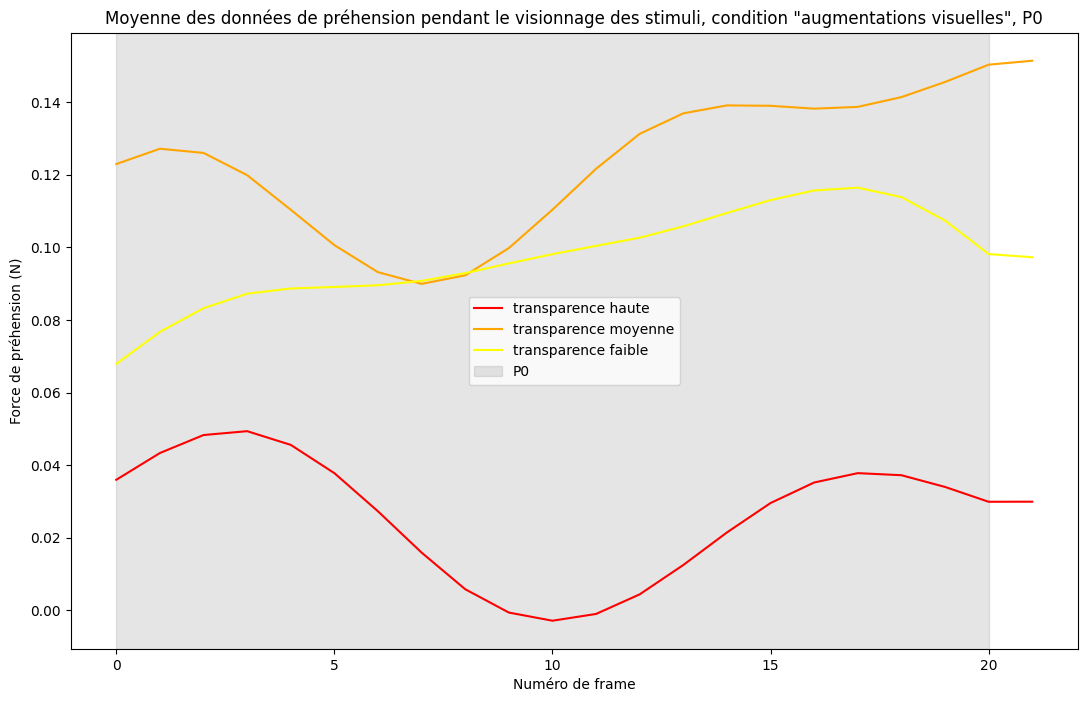

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_transp_P0['highT mean GF']))
ax.plot(x, fusion_transp_P0['highT mean GF'], label = "transparence haute", color = "red")
ax.plot(x, fusion_transp_P0['medT mean GF'], label = "transparence moyenne", color = "orange")
ax.plot(x, fusion_transp_P0['lowT mean GF'], label = "transparence faible", color = "yellow")

ax.axvspan(0, 20, color='grey', alpha=0.2, label="P0")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentations visuelles", P0')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

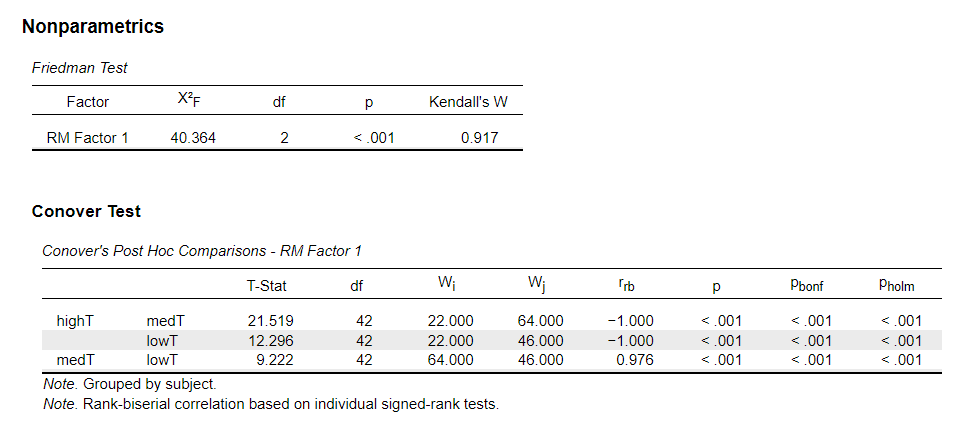

Différence significative pour tous les niveaux de transparence à P0.

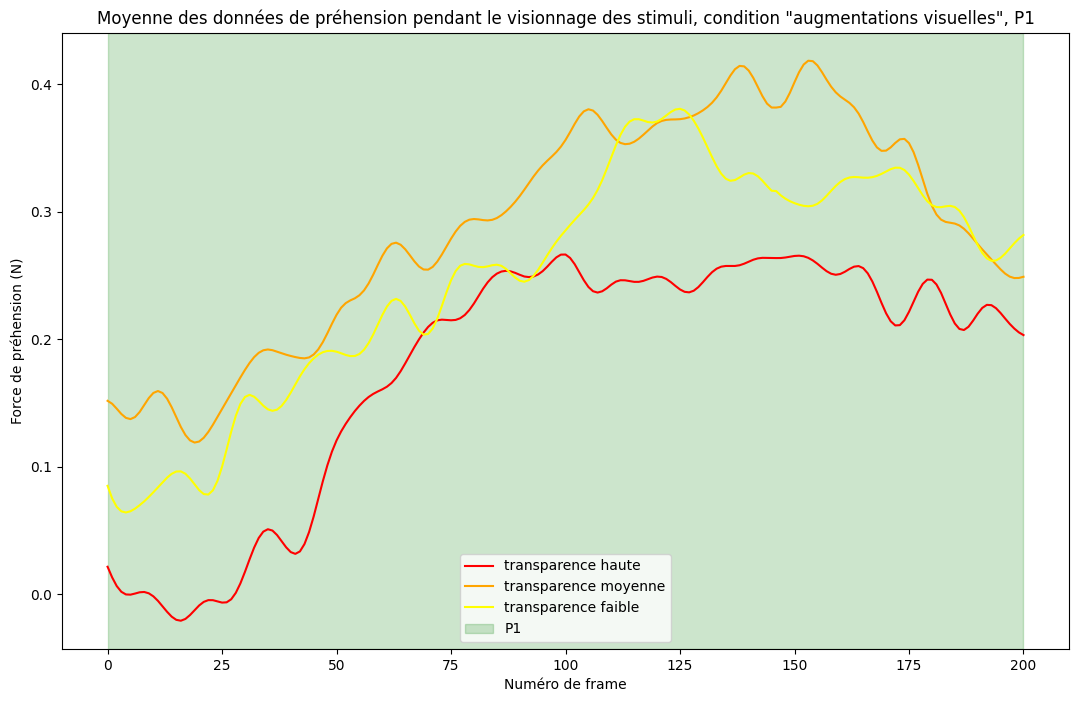

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
x = range(len(fusion_transp_P1['highT mean GF']))
ax.plot(x, fusion_transp_P1['highT mean GF'], label = "transparence haute", color = "red")
ax.plot(x, fusion_transp_P1['medT mean GF'], label = "transparence moyenne", color = "orange")
ax.plot(x, fusion_transp_P1['lowT mean GF'], label = "transparence faible", color = "yellow")

ax.axvspan(0, 200, color='green', alpha=0.2, label="P1")


ax.set_title('Moyenne des données de préhension pendant le visionnage des stimuli, condition "augmentations visuelles", P1')
ax.set_xlabel('Numéro de frame')
ax.set_ylabel('Force de préhension (N)')

ax.legend()

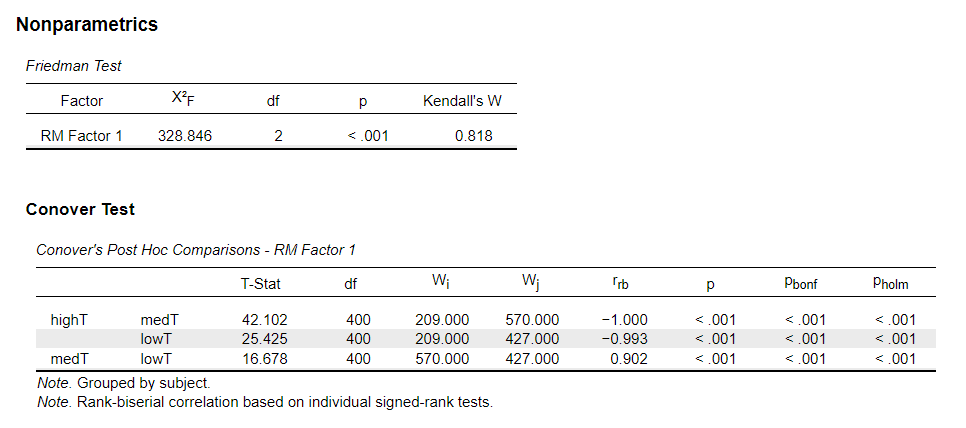

Différence significative entre tous les niveaux de transparence à P1.

### 3bis. Export des données pour analyse sur JASP

In [ ]:
ancil_mean.to_csv('ancil/ancil_mean.csv', index=False)
noAncil_mean.to_csv('ancil/noAncil_mean.csv', index=False)

fusion_ancil.to_csv('ancil/fusion_ancil.csv', index=False)

fusion_ancil_P0.to_csv('ancil/fusion_ancil_P0.csv', index=False)
fusion_ancil_P1.to_csv('ancil/fusion_ancil_P1.csv', index=False)
fusion_ancil_P2.to_csv('ancil/fusion_ancil_P2.csv', index=False)
fusion_ancil_P3.to_csv('ancil/fusion_ancil_P3.csv', index=False)   
fusion_ancil_P4.to_csv('ancil/fusion_ancil_P4.csv', index=False)

In [ ]:
VA_mean.to_csv('augs/VA_mean.csv', index=False)
noneVA_mean.to_csv('augs/noneVA_mean.csv', index=False)
disVA_mean.to_csv('augs/disVA_mean.csv', index=False)

fusion_augs.to_csv('augs/fusion_augs.csv', index=False)

fusion_augs_P0.to_csv('augs/fusion_augs_P0.csv', index=False)
fusion_augs_P1.to_csv('augs/fusion_augs_P1.csv', index=False)


In [ ]:
highT_mean.to_csv('transp/highT_mean.csv', index=False)
medT_mean.to_csv('transp/medT_mean.csv', index=False)
lowT_mean.to_csv('transp/lowT_mean.csv', index=False)

fusion_transp.to_csv('transp/fusion_transp.csv', index=False)

fusion_transp_P1.to_csv('transp/fusion_transp_P1.csv', index=False)
fusion_transp_P0.to_csv('transp/fusion_transp_P0.csv', index=False)


### 4. Analyse des réponses au questionnaire Bellotti Fyans

Nous allons nous intéresser aux tendances que nous avons dégagé précédemment, à savoir les différences entre les modalités d'ancillarité, entre les modalités de transparence et entre les modalités d'augmentation.

#### 4.1 Réponses moyennes

In [ ]:
# ANCILLARITE
BF_ancil = BF[BF['ancil_cond'] == "ancil"][['ancil_cond', 'musician_contrib']]
BF_noAncil = BF[BF['ancil_cond'] == "no_ancil"][['ancil_cond', 'musician_contrib']]


'''print("Modalité geste ancillaire")
print(BF_ancil.head())

print("\nModalité geste non ancillaire")
print(BF_noAncil.head())'''

'print("Modalité geste ancillaire")\nprint(BF_ancil.head())\n\nprint("\nModalité geste non ancillaire")\nprint(BF_noAncil.head())'

In [ ]:
# TRANSPRENCE
BF_lowT = BF[BF['transp_cond'] == "low"][['transp_cond', 'musician_contrib']]
BF_medT = BF[BF['transp_cond'] == "medium"][['transp_cond', 'musician_contrib']]
BF_highT = BF[BF['transp_cond'] == "high"][['transp_cond', 'musician_contrib']]

'''print("Modalité transparence faible")
print(BF_lowT.head())

print("\nModalité transparence moyenne")
print(BF_medT.head())

print("\nModalité transparence haute")
print(BF_highT.head())'''

'print("Modalité transparence faible")\nprint(BF_lowT.head())\n\nprint("\nModalité transparence moyenne")\nprint(BF_medT.head())\n\nprint("\nModalité transparence haute")\nprint(BF_highT.head())'

In [ ]:
# TRANSPRENCE
BF_VA = BF[BF['aug_cond'] == "aug"][['aug_cond', 'musician_contrib']]
BF_disVA = BF[BF['aug_cond'] == "dis"][['aug_cond', 'musician_contrib']]
BF_noneVA = BF[BF['aug_cond'] == "no_aug"][['aug_cond', 'musician_contrib']]

'''print("Modalité aug visuelle congruente")
print(BF_VA.head())

print("\nModalité aug visuelle disruptive")
print(BF_disVA.head())

print("\nModalité pas d'aug visuelle")
print(BF_noneVA.head())'''

'print("Modalité aug visuelle congruente")\nprint(BF_VA.head())\n\nprint("\nModalité aug visuelle disruptive")\nprint(BF_disVA.head())\n\nprint("\nModalité pas d\'aug visuelle")\nprint(BF_noneVA.head())'

In [ ]:
print(f"Réponse moyenne pour la modalité 'geste ancillaire' : {np.mean(BF_ancil['musician_contrib'])}")
print(f"Réponse moyenne pour la modalité 'geste non ancillaire' : {np.mean(BF_noAncil['musician_contrib'])}")

print(f"\nRéponse moyenne pour la modalité 'transp faible' : {np.mean(BF_lowT['musician_contrib'])}")
print(f"Réponse moyenne pour la modalité 'transp moyenne' : {np.mean(BF_medT['musician_contrib'])}")
print(f"Réponse moyenne pour la modalité 'transp haute' : {np.mean(BF_highT['musician_contrib'])}")

print(f"\nRéponse moyenne pour la modalité 'aug visuelle congruente' : {np.mean(BF_VA['musician_contrib'])}")
print(f"Réponse moyenne pour la modalité 'aug visuelle disruptive' : {np.mean(BF_disVA['musician_contrib'])}")
print(f"Réponse moyenne pour la modalité 'pas d'aug visuelle' : {np.mean(BF_noneVA['musician_contrib'])}")

Réponse moyenne pour la modalité 'geste ancillaire' : 54.51715
Réponse moyenne pour la modalité 'geste non ancillaire' : 54.36089775561098

Réponse moyenne pour la modalité 'transp faible' : 33.919511278195486
Réponse moyenne pour la modalité 'transp moyenne' : 51.94543071161049
Réponse moyenne pour la modalité 'transp haute' : 77.28940298507462

Réponse moyenne pour la modalité 'aug visuelle congruente' : 57.39184210526316
Réponse moyenne pour la modalité 'aug visuelle disruptive' : 49.7316479400749
Réponse moyenne pour la modalité 'pas d'aug visuelle' : 56.19776119402986


#### 4.2 Analyse statistique des réponses au questionnaire

In [ ]:
print(f"VA : {BF_VA.shape}")
print(f"disVA : {BF_disVA.shape}")
print(f"noneVA : {BF_noneVA.shape}")
print(f"highT : {BF_highT.shape}")
print(f"medT : {BF_medT.shape}")
print(f"lowT : {BF_lowT.shape}")
print(f"ancil : {BF_ancil.shape}")
print(f"noAncil : {BF_noAncil.shape}")

VA : (266, 2)
disVA : (267, 2)
noneVA : (268, 2)
highT : (268, 2)
medT : (267, 2)
lowT : (266, 2)
ancil : (400, 2)
noAncil : (401, 2)


On constate qu'il n'y a pas toujours le même nombre de lignes : il va falloir retirer des lignes dans nos comparaisons pour que les deux datasets comparés aient le même nombre de lignes.

##### 1. Normalité

In [ ]:
# ANCILLARITE

print("BF, GESTE ANCILLAIRE :")
print(test_normalité(BF_ancil['musician_contrib']))
print('BF, GESTE NON ANCILLAIRE :')
print(test_normalité(BF_noAncil['musician_contrib']))

BF, GESTE ANCILLAIRE :
Statistique de Shapiro-Wilk: 0.9292923808097839
p-value: 8.101893179783548e-13
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
BF, GESTE NON ANCILLAIRE :
Statistique de Shapiro-Wilk: 0.923557460308075
p-value: 2.0009203170225087e-13
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


In [ ]:
# TRANSPARENCE

print("BF, TRANSP FAIBLE :")
print(test_normalité(BF_lowT['musician_contrib']))
print('BF, TRANSP MOYENNE :')
print(test_normalité(BF_medT['musician_contrib']))
print('BF, TRANSP HAUTE :')
print(test_normalité(BF_highT['musician_contrib']))

BF, TRANSP FAIBLE :
Statistique de Shapiro-Wilk: 0.9106594324111938
p-value: 1.708857014226517e-11
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
BF, TRANSP MOYENNE :
Statistique de Shapiro-Wilk: 0.9519330859184265
p-value: 1.0545386430749204e-07
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
BF, TRANSP HAUTE :
Statistique de Shapiro-Wilk: 0.8466290235519409
p-value: 1.3204188032884027e-15
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


In [ ]:
# AUG VISUELLES

print("BF, AUG :")
print(test_normalité(BF_VA['musician_contrib']))
print('BF, AUG DIS :')
print(test_normalité(BF_disVA['musician_contrib']))
print('BF, PAS DE AUG :')
print(test_normalité(BF_noneVA['musician_contrib']))



BF, AUG :
Statistique de Shapiro-Wilk: 0.9417986869812012
p-value: 9.155353808409927e-09
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
BF, AUG DIS :
Statistique de Shapiro-Wilk: 0.9091548323631287
p-value: 1.2338582412729782e-11
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None
BF, PAS DE AUG :
Statistique de Shapiro-Wilk: 0.924071729183197
p-value: 1.858751347283416e-10
p < 0.05 : L'échantillon ne suit pas une distribution normale (rejet de H0)
None


Pas de distribution normale : on fait donc un test de Wilcoxon, et un test de Friedman pour les groupes.

##### 2. Tests de Wilcoxon et de Friedman

- ANCILLARITE

In [ ]:
print(test_wilcoxon(BF_ancil['musician_contrib'], BF_noAncil.iloc[:-1]['musician_contrib'], alpha = 0.05))

Statistique de Wilcoxon: 37180.0
p-value: 0.9398558792617174
p > 0.05 : Les différences entre les deux échantillons ne sont pas significatives (on ne rejette pas H0).


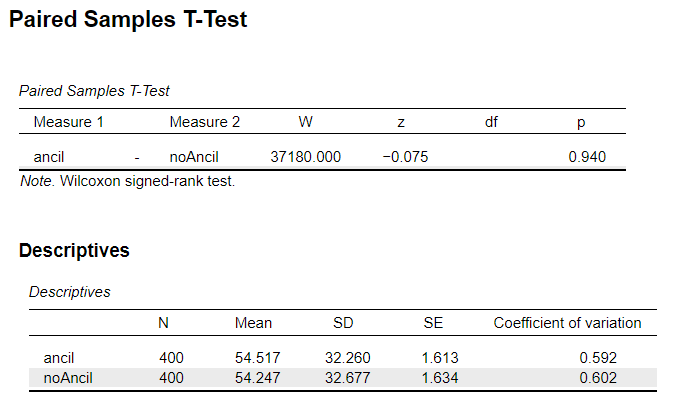

Pas de diff significative entre les modalités d'ancillarité.

- TRANSPARENCE

In [ ]:
print(test_wilcoxon(BF_lowT['musician_contrib'], BF_highT.iloc[:-2]['musician_contrib'], alpha = 0.05))

Statistique de Wilcoxon: 1934.0
p-value: 5.3051027391980736e-36
p < 0.05 : Les différences entre les deux échantillons sont significatives (on rejette H0).


In [ ]:
print(test_wilcoxon(BF_medT['musician_contrib'], BF_highT.iloc[:-1]['musician_contrib'], alpha = 0.05))

Statistique de Wilcoxon: 5200.0
p-value: 7.095657829950495e-23
p < 0.05 : Les différences entre les deux échantillons sont significatives (on rejette H0).


Différences significatives entre les modalités de transparences faible et haute, ainsi qu'entre transparence moyenne et haute.

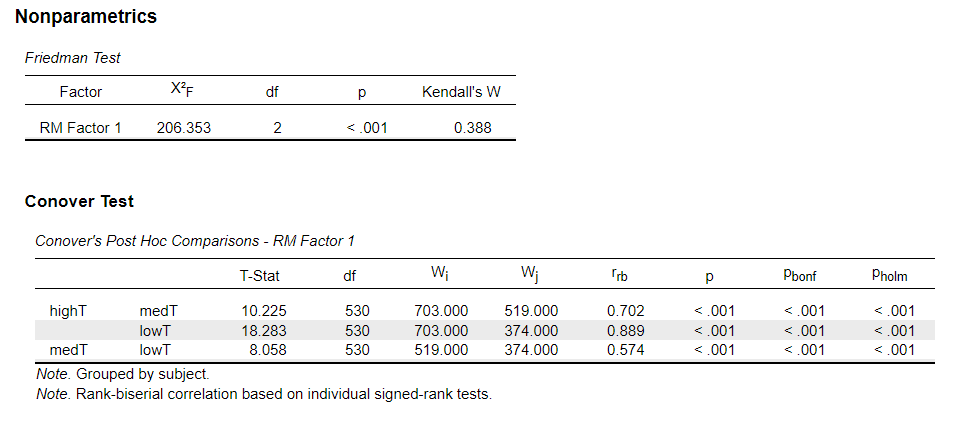

En faisant un test de Friedman pour comparer les trois modalités, on constate que le p < 0.05. Plus encore, les tests post hoc montrent que les 3 échantillons sont significativement différents les uns des autres.

- AUG VISUELLE

In [ ]:
print(test_wilcoxon(BF_VA['musician_contrib'], BF_noneVA.iloc[:-2]['musician_contrib'], alpha = 0.05))

Statistique de Wilcoxon: 16439.5
p-value: 0.3975757746162758
p > 0.05 : Les différences entre les deux échantillons ne sont pas significatives (on ne rejette pas H0).


In [ ]:
print(test_wilcoxon(BF_VA['musician_contrib'], BF_disVA.iloc[:-1]['musician_contrib'], alpha = 0.05))

Statistique de Wilcoxon: 13694.5
p-value: 0.0016589848332539266
p < 0.05 : Les différences entre les deux échantillons sont significatives (on rejette H0).


Pas de diff entre les modalités avec aug visuelle et sans, en revanche diff significative entre aug visuelle et aug visuelle disruptive.

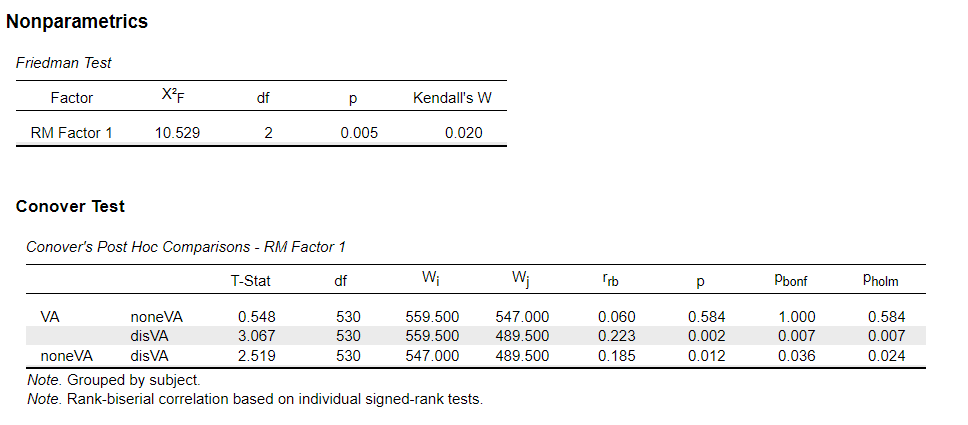

En faisant un test de Friedman pour comparer les 3 modalités, on constate un p < 0.05  : Au moins une des modalités comporte des différences significatives par rapport aux autres. Grâce aux tests post hoc, nous pouvons conclure qu'il s'agit de la modalité d'augmentation visuelle disruptive. Pas de différence notable entre la modalité augmentation visuelle disruptive et la modalité congruente.

### 4bis. Export des données pour analyse sur JASP

In [ ]:
# ancillarité
fusion_BF_ancil = pd.concat([BF_ancil.reset_index(drop=True)['musician_contrib'], BF_noAncil.iloc[:-1].reset_index(drop=True)['musician_contrib']], axis=1)
fusion_BF_ancil.columns = ['ancil', 'noAncil']


In [ ]:
# transparence
fusion_BF_transp = pd.concat([BF_highT.iloc[:-2].reset_index(drop=True)['musician_contrib'], BF_medT.iloc[:-1].reset_index(drop=True)['musician_contrib'], BF_lowT.reset_index(drop=True)['musician_contrib']], axis=1)
fusion_BF_transp.columns = ['highT', 'medT', 'lowT']

In [ ]:
# augmentations visuelles
fusion_BF_augs = pd.concat([BF_VA.reset_index(drop=True)['musician_contrib'], BF_noneVA.iloc[:-2].reset_index(drop=True)['musician_contrib'], BF_disVA.iloc[:-1].reset_index(drop=True)['musician_contrib']], axis=1)
fusion_BF_augs.columns = ['VA', 'noneVA', 'disVA']

print(fusion_BF_transp.head())

   highT    medT   lowT
0  83.06   62.18  40.68
1  97.14   86.93  49.96
2  59.63   37.12  62.18
3  99.77  100.00  49.65
4  51.27   12.06   9.28


In [ ]:
fusion_BF_augs.to_csv('augs/fusion_BF_augs.csv', index=False)
fusion_BF_ancil.to_csv('ancil/fusion_BF_ancil.csv', index=False)
fusion_BF_transp.to_csv('transp/fusion_BF_transp.csv', index=False)